In [1]:
import trace_pb2
import glob
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt


 # Introduction
 ## A bit of intruduction first.
 We use Google's protocol buffers for serializing our data.
 You can read about protocol buffers [here](https://developers.google.com/protocol-buffers).
 The [.proto](trace.proto) file defines our object attributes and is used by the protocol buffer compiler to create the [pb2.py](trace_pb2.py) file.
 The pb2.py file contains the class of functions we can use to store and parse the object we defined in the .proto file.


 # Sample Data
 For the purpose of this demo, I will use a small sample of the data I sent you.
 The local samples are store in the [sample-data](sample-data/) folder.
 You will notice the data files are saved with a .ptc file extension.  This is a file extension we use to denote prototrace (protocol buffer trace) files.

In [2]:
# Set directories
input_directory = "sample-data/"

# Store file paths into list
input_files = glob.glob("{}{}".format(input_directory, "*.ptc"))


 In order to parse the data, you need to create local trace object using the pb2.py file.
 I will only parse one file for this demo.

In [3]:
# Create trace object
trace = trace_pb2.Trace()

# Parse .ptc file
try:
    f = open(input_files[0], "rb")
    trace.ParseFromString(f.read())
    f.close()
except IOError:
    print(sys.arg[1] + ": Could not open file.")


 Each .trc file has a list of attributes available.

In [4]:
# List of attributes
attributes = [
    "data",
    "scan_name",
    "start_frequency",
    "stop_frequency",
    "resolution_bandwidth",
    "video_bandwidth",
    "reference_level",
    "sweep_points",
    "auto_sweep_time",
    "sweep_time",
    "single_sweep_mode",
    "number_of_sweeps",
    "dwell_time",
    "coupling",
    "pre_amp_state",
    "attenuation",
    "auto_attenuation",
    "antenna_offset",
    "detector_type",
    "trace_type",
    "latitude",
    "longitude",
    "azimuth",
    "elevation",
    "measurement_date_time",
    "significant_digits",
]

# Attributs for the .trc file I parsed
for att in attributes:
    if att == "data":
        print("{}: [data array]".format(att, getattr(trace, att)))
    else:
        print("{}: {}".format(att, getattr(trace, att)))


data: [data array]
scan_name: 25K to 2G
start_frequency: 1.0
stop_frequency: 2000.0
resolution_bandwidth: 0.02
video_bandwidth: 0.02
reference_level: -10
sweep_points: 100001
auto_sweep_time: -1
sweep_time: 10
single_sweep_mode: -1
number_of_sweeps: 6
dwell_time: 20
coupling: 1
pre_amp_state: 0
attenuation: 0
auto_attenuation: -1
antenna_offset: 0
detector_type: 0
trace_type: 0
latitude: 0.0
longitude: 0.0
azimuth: 90
elevation: 22
measurement_date_time: Tuesday, April 23, 2019
significant_digits: 1


 The amplitude data is saved as integers in order to save space by taking advantage
 of the protocol buffer varint type. In order to convert back to doubles,
 the values are multiplied by 10^(trace.significant_digits)

In [5]:
data_y = np.array(trace.data) / (10 ** int(trace.significant_digits))


In [6]:
print("Data before conversion: {}".format(np.array(trace.data)[0:3]))
print("Data after conversion: {}".format(data_y[0:3]))


Data before conversion: [530 535 535]
Data after conversion: [53.  53.5 53.5]


 The frequency data is not stored as an array.
 The frequency array must be created using the start_frequency,
 stop_frequency, and sweep_points attributes

In [7]:
data_x = np.linspace(trace.start_frequency, trace.stop_frequency, trace.sweep_points)
# Sanity check
print("Start Frequency: {}".format(data_x[0]))
print("Stop Frequency: {}".format(data_x[-1]))
print("Amplitude data shape: {}".format(data_y.shape))
print("Frequency data shape: {}".format(data_x.shape))


Start Frequency: 1.0
Stop Frequency: 2000.0
Amplitude data shape: (100001,)
Frequency data shape: (100001,)


In [8]:
def plot_trace(
    trace_x,
    trace_y,
    title="Trace Plot",
    xlabel="Frequency (MHz)",
    ylabel="Amplitude (dBuV/m)",
):
    plt.plot(trace_x, trace_y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ion()
    plt.show()



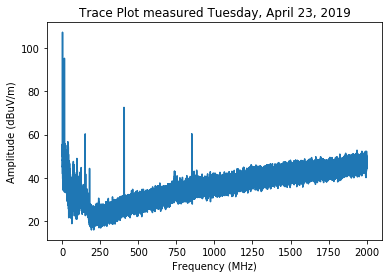

In [9]:
plot_trace(
    data_x, data_y, title="Trace Plot measured {}".format(trace.measurement_date_time)
)
